<a href="https://colab.research.google.com/github/MihajloStrajin/PPPO_IT7_2018/blob/main/IT7_2018_Segmentacija.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Univerzitet u Novom Sadu**

**Fakultet tehničkih nauka**

**Departman za industrijsko inženjerstvo i menadžment**

**Inženjerstvo informacionih sistema**

**Predmet**: Principi prezentacije i prepoznavanja oblika

**Tema**: Segmentacija

**Student**: Mihajlo Strajin IT7/2018

# UVOD
Tema ovog projekta jeste segmentacija. Segmentacija predstavlja jednu od tehnika digitalne obrade slike. Projekat je podeljen na dva dela, teorijski i praktični deo. U teorijskom delu objašnjeno je šta segmentacija predstavlja i opisan je set podataka koji je korišćen za izradu praktičnog dela. Nakon toga predstavljen je praktični deo projekta. 

# SEGMENTACIJA
Segmentacija predstavlja proces podele fotografija na više segmenata, odnosno regiona. Segmentacija fotografije je jedan od najvažnijih procesa kada je u pitanju računarska obrada fotografije. Podrazumeva proces koji deli fotografiju na njene sastavne delove, izdvajajući delove (segmente) koji su od interesa u odnosu na prirodu fotografija. Ti segmenti su definisani kao grupe piksela koji dele zajedničke karakteristike (npr. intenzitet piksela, tekstura itd.).

Tehnike segmentacije slike možemo podeliti u tri glavne kategorije:[1]

  1. Rast i smanjenje regiona
  2. Metode grupisanja (klastering)
  3. Detekcija granica

Metode rasta i smanjivanja regiona koriste domen slike na osnovu reda i kolone. Tehnike grupisanja se mogu primeniti na bilo koji domen, kao što je bilo koji N-dimenzionalna boja ili prostor obeležja, čije komponente mogu čak uključivati i koordinate prostornog domena. Iz ove perspektive, kategorija regiona koja raste i smanjuje se može se smatrati podskupom metoda grupisanja, ali je ograničena na prostorni domen. Metoda detekcije granica je proširenje tehnika detekcije ivica.

Postoje dve osnovne vrste segmentacije
1. semantička segmentacija 
2. segmentacija instance. 

Semantička segmentacija podrazumeva tehniku izdvajanja regiona i kao takva izdvaja ceo objekat od pozadine pridružujući piksele čija je svetlost ispot nekog praga pozadine. S druge strane, segmentacije instance predstavlja tehniku pronalaženja ivica koja je zasnovana na izdvajanju samo onih piksela koji pripadaju ivicama objekta.

# SET PODATAKA
Set podataka predstavlja skup slika i njihovih maski na kojima je moguće detektovati so. Maske predstavljaju delove slike na kojima se nalazi so. Postoje dva seta podataka, trening i test podaci. U svakom folderu se nalaze slike i maske. Krajnji rezultat se upisuje u csv fajl pod nazivom *sample_submission*, odnosno za svaku sliku se upisuje na kojim pikselima se nalazi so. Takođe postoje još dva csv fajla. U jednom se nalaze maske slika u kodiranom formatu, dok se u drugom nalaze dubine slika. 

# Zaključak
Tema je ispraćena kroz skup podataka u vidu slika i maski seizmičkih istraživanja. Cilj je bio odrediti segmente prisustva soli. 
Rad na ovom projektu je omogućio lakše razumevanje segmentacije slika, funkcionisanja neuronskih mreža kao i razumevanja dobijenog skupa podataka. 

Na početku je prvo preuzet i raspakovan skup podataka.

In [2]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1y3S7yfpdrR_MutnotPAR8OnNqRX3POVF' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1y3S7yfpdrR_MutnotPAR8OnNqRX3POVF" -O dataset.zip && rm -rf /tmp/cookies.txt

--2022-08-25 14:30:08--  https://docs.google.com/uc?export=download&confirm=t&id=1y3S7yfpdrR_MutnotPAR8OnNqRX3POVF
Resolving docs.google.com (docs.google.com)... 142.251.2.138, 142.251.2.101, 142.251.2.139, ...
Connecting to docs.google.com (docs.google.com)|142.251.2.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/lirht4bnpku3p67ou7uec2uk8q3cngpu/1661437800000/06049624160957438625/*/1y3S7yfpdrR_MutnotPAR8OnNqRX3POVF?e=download&uuid=745668f4-574d-4bcb-8806-2763648c4574 [following]
--2022-08-25 14:30:09--  https://doc-0s-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/lirht4bnpku3p67ou7uec2uk8q3cngpu/1661437800000/06049624160957438625/*/1y3S7yfpdrR_MutnotPAR8OnNqRX3POVF?e=download&uuid=745668f4-574d-4bcb-8806-2763648c4574
Resolving doc-0s-64-docs.googleusercontent.com (doc-0s-64-docs.googleusercontent.com)... 74.125.137.132, 2607

In [3]:
!unzip dataset.zip

Archive:  dataset.zip
  inflating: competition_data.zip    
  inflating: depths.csv              
  inflating: flamingo.zip            
  inflating: sample_submission.csv   
  inflating: test.zip                
  inflating: train.csv               
  inflating: train.zip               


In [4]:
!mkdir -p /content/dataset/train
!unzip train.zip -d /content/dataset/train

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/train/images/d80ead8703.png  
  inflating: /content/dataset/train/images/b012e9ebb0.png  
  inflating: /content/dataset/train/images/d3034e7a60.png  
  inflating: /content/dataset/train/images/ae2ef70d51.png  
  inflating: /content/dataset/train/images/1af44a9db0.png  
  inflating: /content/dataset/train/images/41cfd4b320.png  
  inflating: /content/dataset/train/images/853e89d0d3.png  
  inflating: /content/dataset/train/images/2a484baa26.png  
  inflating: /content/dataset/train/images/92e617896e.png  
  inflating: /content/dataset/train/images/b70f0ab0c2.png  
  inflating: /content/dataset/train/images/e8757626a1.png  
  inflating: /content/dataset/train/images/6a3d92ce59.png  
  inflating: /content/dataset/train/images/127ef4105f.png  
  inflating: /content/dataset/train/images/d21012f5c1.png  
  inflating: /content/dataset/train/images/1cb9549d2c.png  
  inflating: /content/dataset/train/images/e030bd

In [5]:
!mkdir -p /content/dataset/test
!unzip test.zip -d /content/dataset/test

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/test/images/a3df74dd31.png  
  inflating: /content/dataset/test/images/187ecc32d5.png  
  inflating: /content/dataset/test/images/54538419f5.png  
  inflating: /content/dataset/test/images/93614d4b95.png  
  inflating: /content/dataset/test/images/50a91adce8.png  
  inflating: /content/dataset/test/images/97d23cea10.png  
  inflating: /content/dataset/test/images/ca04c19c0b.png  
  inflating: /content/dataset/test/images/d168218bac.png  
  inflating: /content/dataset/test/images/a670e833a4.png  
  inflating: /content/dataset/test/images/a964a0f499.png  
  inflating: /content/dataset/test/images/371bf59030.png  
  inflating: /content/dataset/test/images/fc74f77bae.png  
  inflating: /content/dataset/test/images/f63dc1e3be.png  
  inflating: /content/dataset/test/images/b807539a5f.png  
  inflating: /content/dataset/test/images/1dfcbf4bca.png  
  inflating: /content/dataset/test/images/a971d2ae53.png  
  inf

Nakon učitavanja podataka neophodno je importovati neophodne biblioteke koje će se koristiti u daljoj izradi projekta. 

In [7]:
import numpy as np
import pandas as pd
import os

from random import randint

import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import seaborn as sns
sns.set_style("white")

from sklearn.model_selection import train_test_split

from skimage.transform import resize

import torch

from keras.preprocessing.image import load_img
from keras import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.models import load_model
from tensorflow.keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate, Dropout

from tqdm import tqdm_notebook

U sledećoj ćeliji definisane su promenljive i funkcije koje će se koristiti na nekoliko mesta u projektu. Kako ne bi kod bio dupliran definisane su na jednom mestu. Funkcije koje su definisane služe za povećavanje i smanjivanje dimenzije slike.

In [8]:
img_size_ori = 101
img_size_target = 128

def upsample(img):
    if img_size_ori == img_size_target:
        return img
    return resize(img, (img_size_target, img_size_target), mode='constant', preserve_range=True)
    #res = np.zeros((img_size_target, img_size_target), dtype=img.dtype)
    #res[:img_size_ori, :img_size_ori] = img
    #return res
    
def downsample(img):
    if img_size_ori == img_size_target:
        return img
    return resize(img, (img_size_ori, img_size_ori), mode='constant', preserve_range=True)

U naredne tri ćelije se učitavaju csv podaci, slike i maske.

In [9]:
train_df = pd.read_csv("/content/train.csv", index_col="id", usecols=[0])
depths_df = pd.read_csv("/content/depths.csv", index_col="id")
train_df = train_df.join(depths_df)
test_df = depths_df[~depths_df.index.isin(train_df.index)]

In [10]:
train_df["images"] = [np.array(load_img("/content/dataset/train/images/{}.png".format(idx), grayscale=True)) / 255 for idx in tqdm_notebook(train_df.index)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


  0%|          | 0/4000 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [11]:
train_df["masks"] = [np.array(load_img("/content/dataset/train/masks/{}.png".format(idx), grayscale=True)) / 255 for idx in tqdm_notebook(train_df.index)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


  0%|          | 0/4000 [00:00<?, ?it/s]

U narednom koraku prikazana je distribucija podataka. Za svaku sliku se gleda koliko ima prekrivenosti soli. Najveći broj slika nema prekrivenost odnosno nema soli.

In [12]:
train_df["coverage"] = train_df.masks.map(np.sum) / pow(img_size_ori, 2)/250

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Coverage')

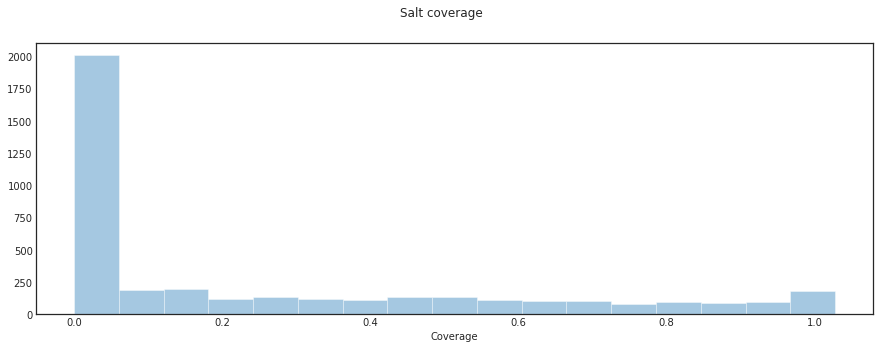

In [13]:
fig, axs = plt.subplots(figsize=(15,5))
sns.distplot(train_df.coverage,  kde=False, ax=axs)
plt.suptitle("Salt coverage")
axs.set_xlabel("Coverage")

Ovde možemo videti da trening i test podaci imaju približnu distribuciju. Možemo videti da nema outlier-a na osnovu čega se može zaključiti da su podaci dobri za obradu.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Depth distribution')

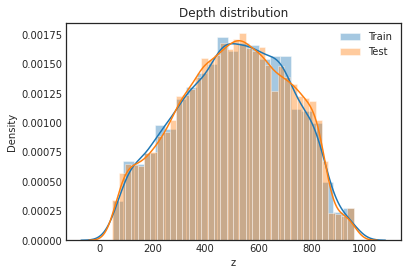

In [15]:
sns.distplot(train_df.z, label="Train")
sns.distplot(test_df.z, label="Test")
plt.legend()
plt.title("Depth distribution")

Zatim je prikazano nekoliko slika sa maskama. Maske su označene zelenom bojom.

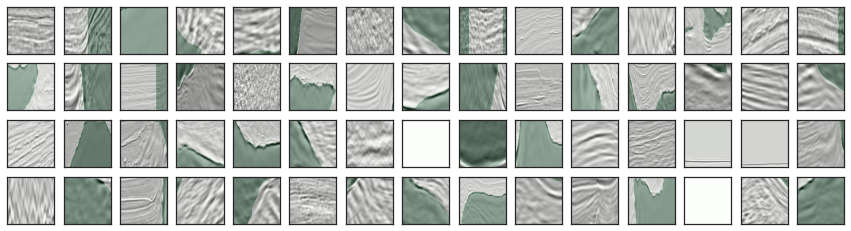

In [16]:
max_images = 60
grid_width = 15
grid_height = int(max_images / grid_width)
fig, axs = plt.subplots(grid_height, grid_width, figsize=(grid_width, grid_height))
for i, idx in enumerate(train_df.index[:max_images]):
    img = train_df.loc[idx].images
    mask = train_df.loc[idx].masks
    ax = axs[int(i / grid_width), i % grid_width]
    ax.imshow(img, cmap="Greys")
    ax.imshow(mask, alpha=0.3, cmap="Greens")
    ax.set_yticklabels([])
    ax.set_xticklabels([])

Prvi deo projekta je odradjen zbog analize slika, kako bi se videlo kakve su slike i sami podaci. U nastavku su kreirani train, tast i validation podaci. Validation podaci služe kako bi se podesili podaci za trening. Ukupno 80% od svih podataka ide u trening podatke. Koristi se funkcija train_test_split iz sklearn biblioteke kojoj se prosleđuju indeksi, lista slika, lista maski, *coverage* vrednosti, dubine i koliko procenata ide u test podatke.

In [37]:
ids_train, ids_valid, x_train, x_valid, y_train, y_valid, cov_train, cov_test, depth_train, depth_test = train_test_split(
    train_df.index.values,
    np.array(train_df.images.map(upsample).tolist()).reshape(-1, img_size_target, img_size_target, 1), 
    np.array(train_df.masks.map(upsample).tolist()).reshape(-1, img_size_target, img_size_target, 1), 
    train_df.coverage.values,
    train_df.z.values,
    test_size=0.2)

U sledećoj ćeliji odrađeno je skaliranje slika kako bi bile u odgovarajućoj dimenziji. Prikazana je originalna slika i skalirana slika.

Text(0.5, 1.0, 'Scaled image')

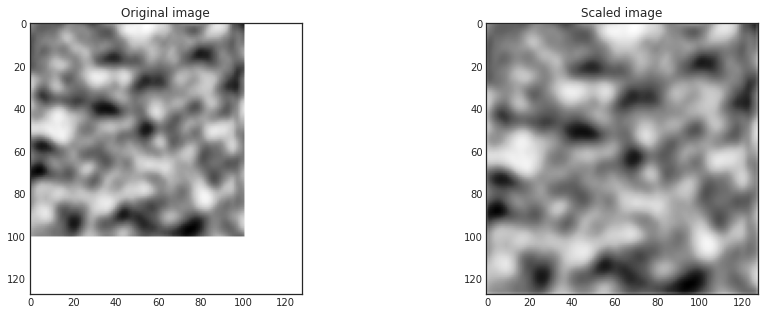

In [38]:
tmp_img = np.zeros((img_size_target, img_size_target), dtype=train_df.images.loc[ids_train[10]].dtype)
tmp_img[:img_size_ori, :img_size_ori] = train_df.images.loc[ids_train[10]]
fix, axs = plt.subplots(1, 2, figsize=(15,5))
axs[0].imshow(tmp_img, cmap="Greys")
axs[0].set_title("Original image")
axs[1].imshow(x_train[10].squeeze(), cmap="Greys")
axs[1].set_title("Scaled image")

U narednom koraku pravi se neuronska mreža i model. U ovom slučaju nije pozvan nijedan model neke popularne arhitekture. Kako bi se izgradio model koriste se 2 konvoluciona sloja, *MaxPooling* sloj i *Dropout* sloj.

In [39]:
def build_model(input_layer, start_neurons):
    # 128 -> 64
    conv1 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(input_layer)
    conv1 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(conv1)
    pool1 = MaxPooling2D((2, 2))(conv1)
    pool1 = Dropout(0.25)(pool1)

    # 64 -> 32
    conv2 = Conv2D(start_neurons * 2, (3, 3), activation="relu", padding="same")(pool1)
    conv2 = Conv2D(start_neurons * 2, (3, 3), activation="relu", padding="same")(conv2)
    pool2 = MaxPooling2D((2, 2))(conv2)
    pool2 = Dropout(0.5)(pool2)

    # 32 -> 16
    conv3 = Conv2D(start_neurons * 4, (3, 3), activation="relu", padding="same")(pool2)
    conv3 = Conv2D(start_neurons * 4, (3, 3), activation="relu", padding="same")(conv3)
    pool3 = MaxPooling2D((2, 2))(conv3)
    pool3 = Dropout(0.5)(pool3)

    # 16 -> 8
    conv4 = Conv2D(start_neurons * 8, (3, 3), activation="relu", padding="same")(pool3)
    conv4 = Conv2D(start_neurons * 8, (3, 3), activation="relu", padding="same")(conv4)
    pool4 = MaxPooling2D((2, 2))(conv4)
    pool4 = Dropout(0.5)(pool4)

    # Middle
    convm = Conv2D(start_neurons * 16, (3, 3), activation="relu", padding="same")(pool4)
    convm = Conv2D(start_neurons * 16, (3, 3), activation="relu", padding="same")(convm)

    # 8 -> 16
    deconv4 = Conv2DTranspose(start_neurons * 8, (3, 3), strides=(2, 2), padding="same")(convm)
    uconv4 = concatenate([deconv4, conv4])
    uconv4 = Dropout(0.5)(uconv4)
    uconv4 = Conv2D(start_neurons * 8, (3, 3), activation="relu", padding="same")(uconv4)
    uconv4 = Conv2D(start_neurons * 8, (3, 3), activation="relu", padding="same")(uconv4)

    # 16 -> 32
    deconv3 = Conv2DTranspose(start_neurons * 4, (3, 3), strides=(2, 2), padding="same")(uconv4)
    uconv3 = concatenate([deconv3, conv3])
    uconv3 = Dropout(0.5)(uconv3)
    uconv3 = Conv2D(start_neurons * 4, (3, 3), activation="relu", padding="same")(uconv3)
    uconv3 = Conv2D(start_neurons * 4, (3, 3), activation="relu", padding="same")(uconv3)

    # 32 -> 64
    deconv2 = Conv2DTranspose(start_neurons * 2, (3, 3), strides=(2, 2), padding="same")(uconv3)
    uconv2 = concatenate([deconv2, conv2])
    uconv2 = Dropout(0.5)(uconv2)
    uconv2 = Conv2D(start_neurons * 2, (3, 3), activation="relu", padding="same")(uconv2)
    uconv2 = Conv2D(start_neurons * 2, (3, 3), activation="relu", padding="same")(uconv2)

    # 64 -> 128
    deconv1 = Conv2DTranspose(start_neurons * 1, (3, 3), strides=(2, 2), padding="same")(uconv2)
    uconv1 = concatenate([deconv1, conv1])
    uconv1 = Dropout(0.5)(uconv1)
    uconv1 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(uconv1)
    uconv1 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(uconv1)

    #uconv1 = Dropout(0.5)(uconv1)
    output_layer = Conv2D(1, (1,1), padding="same", activation="sigmoid")(uconv1)
    
    return output_layer

input_layer = Input((img_size_target, img_size_target, 1))
output_layer = build_model(input_layer, 16)

Nakon postavljanja arhitekture, pravi se model.

In [40]:
model = Model(input_layer, output_layer)

*Loss* služi da bi se videlo koliko dobro mreža radi. Na osnovu toga se radi treniranje. *Optimizer* podešava težine za izmenu prilikom treniranja na osnovu *loss*-a.

In [41]:
opt = Adam(
    learning_rate=0.00001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name='Adam'
)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

In [42]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_19 (Conv2D)             (None, 128, 128, 16  160         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_20 (Conv2D)             (None, 128, 128, 16  2320        ['conv2d_19[0][0]']              
                                )                                                           

U narednom delu vrši se treniranje. Ukoliko posle 10 epoha ne bude napretka treniranje će biti prekinuto. Najbitniji parametar koji je podešen za treniranje je *learning rate*.

In [44]:
early_stopping = EarlyStopping(patience=10, verbose=1)
model_checkpoint = ModelCheckpoint("./keras.model", save_best_only=True, verbose=1)
reduce_lr = ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.00001, verbose=1)

epochs = 30
batch_size = 64

history = model.fit(x_train, y_train,
                    validation_data=[x_valid, y_valid], 
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[early_stopping, model_checkpoint, reduce_lr])

Epoch 1/30
50/50 [==============================] - ETA: 0s - loss: -1.7875 - accuracy: 0.1406 
Epoch 1: val_loss improved from inf to -1.50649, saving model to ./keras.model
50/50 [==============================] - 569s 11s/step - loss: -1.7875 - accuracy: 0.1406 - val_loss: -1.5065 - val_accuracy: 0.0174 - lr: 1.0000e-05
Epoch 2/30
34/50 [===================>..........] - ETA: 2:51 - loss: -24.6697 - accuracy: 0.0291

KeyboardInterrupt: ignored

Nakon treniranja trebalo bi da vidimo kako learning rate opada, a accurancz raste kako treniranje odmiče. To ovde nije slučaj ili zbog loše podešenih parametara ili zbog lošeg modela.

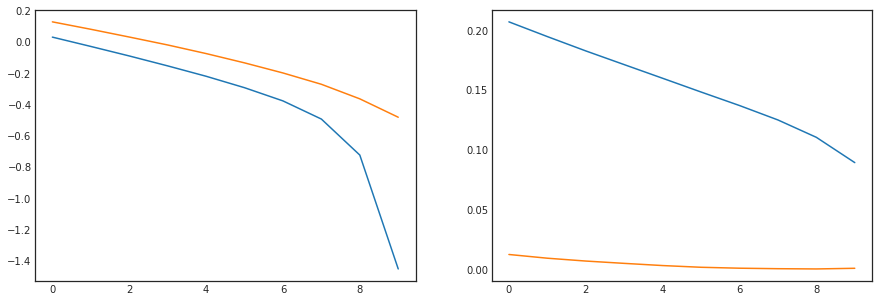

In [45]:
fig, (ax_loss, ax_acc) = plt.subplots(1, 2, figsize=(15,5))
ax_loss.plot(history.epoch, history.history["loss"], label="Train loss")
ax_loss.plot(history.epoch, history.history["val_loss"], label="Validation loss")
ax_acc.plot(history.epoch, history.history["accuracy"], label="Train accuracy")
ax_acc.plot(history.epoch, history.history["val_accuracy"], label="Validation accuracy")

Zatim vršimo predikciju. Kao rezultat treba da se dobije slika sa maskom za tu sliku.

In [31]:
model = load_model("./keras.model")

In [32]:
preds_valid = model.predict(x_valid).reshape(-1, img_size_target, img_size_target)
preds_valid = np.array([downsample(x) for x in preds_valid])
y_valid_ori = np.array([train_df.loc[idx].masks for idx in ids_valid])

Text(0.5, 0.98, 'Green: salt, Red: prediction. Top-left: coverage class, top-right: salt coverage, bottom-left: depth')

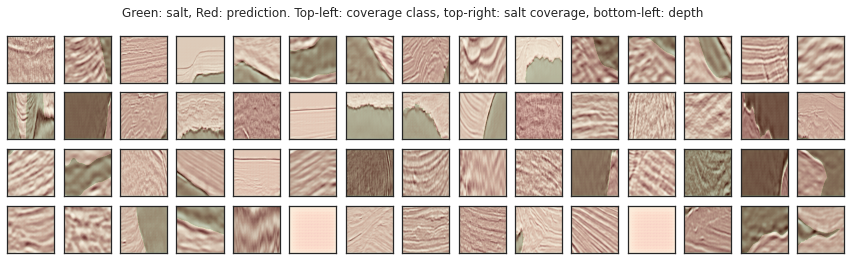

In [35]:
max_images = 60
grid_width = 15
grid_height = int(max_images / grid_width)
fig, axs = plt.subplots(grid_height, grid_width, figsize=(grid_width, grid_height))
for i, idx in enumerate(ids_valid[:max_images]):
    img = train_df.loc[idx].images
    mask = train_df.loc[idx].masks
    pred = preds_valid[i]
    ax = axs[int(i / grid_width), i % grid_width]
    ax.imshow(img, cmap="Greys")
    ax.imshow(mask, alpha=0.3, cmap="Greens")
    ax.imshow(pred, alpha=0.3, cmap="OrRd")
    ax.set_yticklabels([])
    ax.set_xticklabels([])
plt.suptitle("Green: salt, Red: prediction. Top-left: coverage class, top-right: salt coverage, bottom-left: depth")

In [46]:
# src: https://www.kaggle.com/aglotero/another-iou-metric
def iou_metric(y_true_in, y_pred_in, print_table=False):
    labels = y_true_in
    y_pred = y_pred_in
    
    true_objects = 2
    pred_objects = 2

    intersection = np.histogram2d(labels.flatten(), y_pred.flatten(), bins=(true_objects, pred_objects))[0]

    # Compute areas (needed for finding the union between all objects)
    area_true = np.histogram(labels, bins = true_objects)[0]
    area_pred = np.histogram(y_pred, bins = pred_objects)[0]
    area_true = np.expand_dims(area_true, -1)
    area_pred = np.expand_dims(area_pred, 0)

    # Compute union
    union = area_true + area_pred - intersection

    # Exclude background from the analysis
    intersection = intersection[1:,1:]
    union = union[1:,1:]
    union[union == 0] = 1e-9

    # Compute the intersection over union
    iou = intersection / union

    # Precision helper function
    def precision_at(threshold, iou):
        matches = iou > threshold
        true_positives = np.sum(matches, axis=1) == 1   # Correct objects
        false_positives = np.sum(matches, axis=0) == 0  # Missed objects
        false_negatives = np.sum(matches, axis=1) == 0  # Extra objects
        tp, fp, fn = np.sum(true_positives), np.sum(false_positives), np.sum(false_negatives)
        return tp, fp, fn

    # Loop over IoU thresholds
    prec = []
    if print_table:
        print("Thresh\tTP\tFP\tFN\tPrec.")
    for t in np.arange(0.5, 1.0, 0.05):
        tp, fp, fn = precision_at(t, iou)
        if (tp + fp + fn) > 0:
            p = tp / (tp + fp + fn)
        else:
            p = 0
        if print_table:
            print("{:1.3f}\t{}\t{}\t{}\t{:1.3f}".format(t, tp, fp, fn, p))
        prec.append(p)
    
    if print_table:
        print("AP\t-\t-\t-\t{:1.3f}".format(np.mean(prec)))
    return np.mean(prec)

def iou_metric_batch(y_true_in, y_pred_in):
    batch_size = y_true_in.shape[0]
    metric = []
    for batch in range(batch_size):
        value = iou_metric(y_true_in[batch], y_pred_in[batch])
        metric.append(value)
    return np.mean(metric)

In [53]:
thresholds = np.linspace(0, 1, 50)
ious = np.array([iou_metric_batch(y_valid_ori, np.int32(preds_valid > threshold)) for threshold in tqdm_notebook(thresholds)])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/50 [00:00<?, ?it/s]

In [55]:
threshold_best_index = np.argmax(ious[9:-10]) + 9
iou_best = ious[threshold_best_index]
threshold_best = thresholds[threshold_best_index]

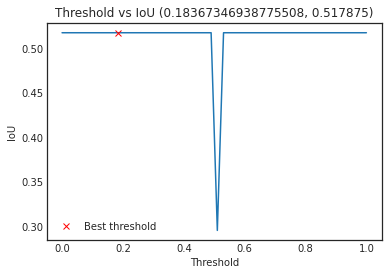

In [56]:
plt.plot(thresholds, ious)
plt.plot(threshold_best, iou_best, "xr", label="Best threshold")
plt.xlabel("Threshold")
plt.ylabel("IoU")
plt.title("Threshold vs IoU ({}, {})".format(threshold_best, iou_best))
plt.legend()

In [48]:
x_test = np.array([upsample(np.array(load_img("/content/dataset/test/images/{}.png".format(idx), grayscale=True))) / 255 for idx in tqdm_notebook(test_df.index)]).reshape(-1, img_size_target, img_size_target, 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


  0%|          | 0/18000 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [50]:
preds_test = model.predict(x_test)

In [57]:
def RLenc(img, order='F', format=True):
    """
    img is binary mask image, shape (r,c)
    order is down-then-right, i.e. Fortran
    format determines if the order needs to be preformatted (according to submission rules) or not

    returns run length as an array or string (if format is True)
    """
    bytes = img.reshape(img.shape[0] * img.shape[1], order=order)
    runs = []  ## list of run lengths
    r = 0  ## the current run length
    pos = 1  ## count starts from 1 per WK
    for c in bytes:
        if (c == 0):
            if r != 0:
                runs.append((pos, r))
                pos += r
                r = 0
            pos += 1
        else:
            r += 1

    # if last run is unsaved (i.e. data ends with 1)
    if r != 0:
        runs.append((pos, r))
        pos += r
        r = 0

    if format:
        z = ''

        for rr in runs:
            z += '{} {} '.format(rr[0], rr[1])
        return z[:-1]
    else:
        return runs
        
pred_dict = {idx: RLenc(np.round(downsample(preds_test[i]) > threshold_best)) for i, idx in enumerate(tqdm_notebook(test_df.index.values))}

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/18000 [00:00<?, ?it/s]

In [59]:
sub = pd.DataFrame.from_dict(pred_dict,orient='index')
sub.index.names = ['id']
sub.columns = ['rle_mask']
sub.to_csv('submission.csv')